## Running the Python Scripts

In [1]:
!git clone https://github.com/Anushka-De/stat359.git
%cd stat359/student/Assignment_3
!ls

Cloning into 'stat359'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 257 (delta 91), reused 53 (delta 53), pack-reused 150 (from 2)
Receiving objects: 100% (257/257), 2.59 MiB | 17.94 MiB/s, done.
Resolving deltas: 100% (157/157), done.
/content/stat359/student/Assignment_3
acc_vs_epoch.png	   README.md
best_mlp_fasttext.pt	   train_sentiment_bert_classifier.py
confusion_matrix_test.png  train_sentiment_gpt_classifier.py
handout.html		   train_sentiment_gru_classifier.py
handout.ipynb		   train_sentiment_lstm_classifier.py
loss_vs_epoch.png	   train_sentiment_mlp_classifier.py
macro_f1_vs_epoch.png	   train_sentiment_rnn_classifier.py
open_questions.ipynb


In [ ]:
!pip -q install "datasets<4.0.0"
!pip install -q numpy pandas gensim torch scikit-learn matplotlib ipywidgets nltk tqdm

In [ ]:
print("\n========== Loading Dataset ==========")
from datasets import load_dataset

dataset = load_dataset('financial_phrasebank', 'sentences_50agree', trust_remote_code=True)
print("Dataset loaded. Example:", dataset['train'][:5])

In [ ]:
#Set Seed
import random
random.seed(42)

**Task 1 Implementation**

In [ ]:
#!python train_sentiment_mlp_classifier.py

**Task 2 Implementation**

In [ ]:
#!python train_sentiment_lstm_classifier.py

**Implementation of Provided Scripts**

In [ ]:
#!python train_sentiment_rnn_classifier.py

In [ ]:
#!python train_sentiment_gru_classifier.py

In [ ]:
#!python train_sentiment_bert_classifier.py

In [ ]:
#!python train_sentiment_gpt_classifier.py

In [ ]:
#Saving Outputs
#!zip -r outputs.zip outputs
#from google.colab import files
#files.download("outputs.zip")

## Open Ended Reflecion Questions

### 1. Training Dynamics
*Focus on your MLP and LSTM implementations*

Did your models show signs of overfitting or underfitting? What architectural or training changes could address this?
How did using class weights affect training stability and final performance?



**MLP Model**

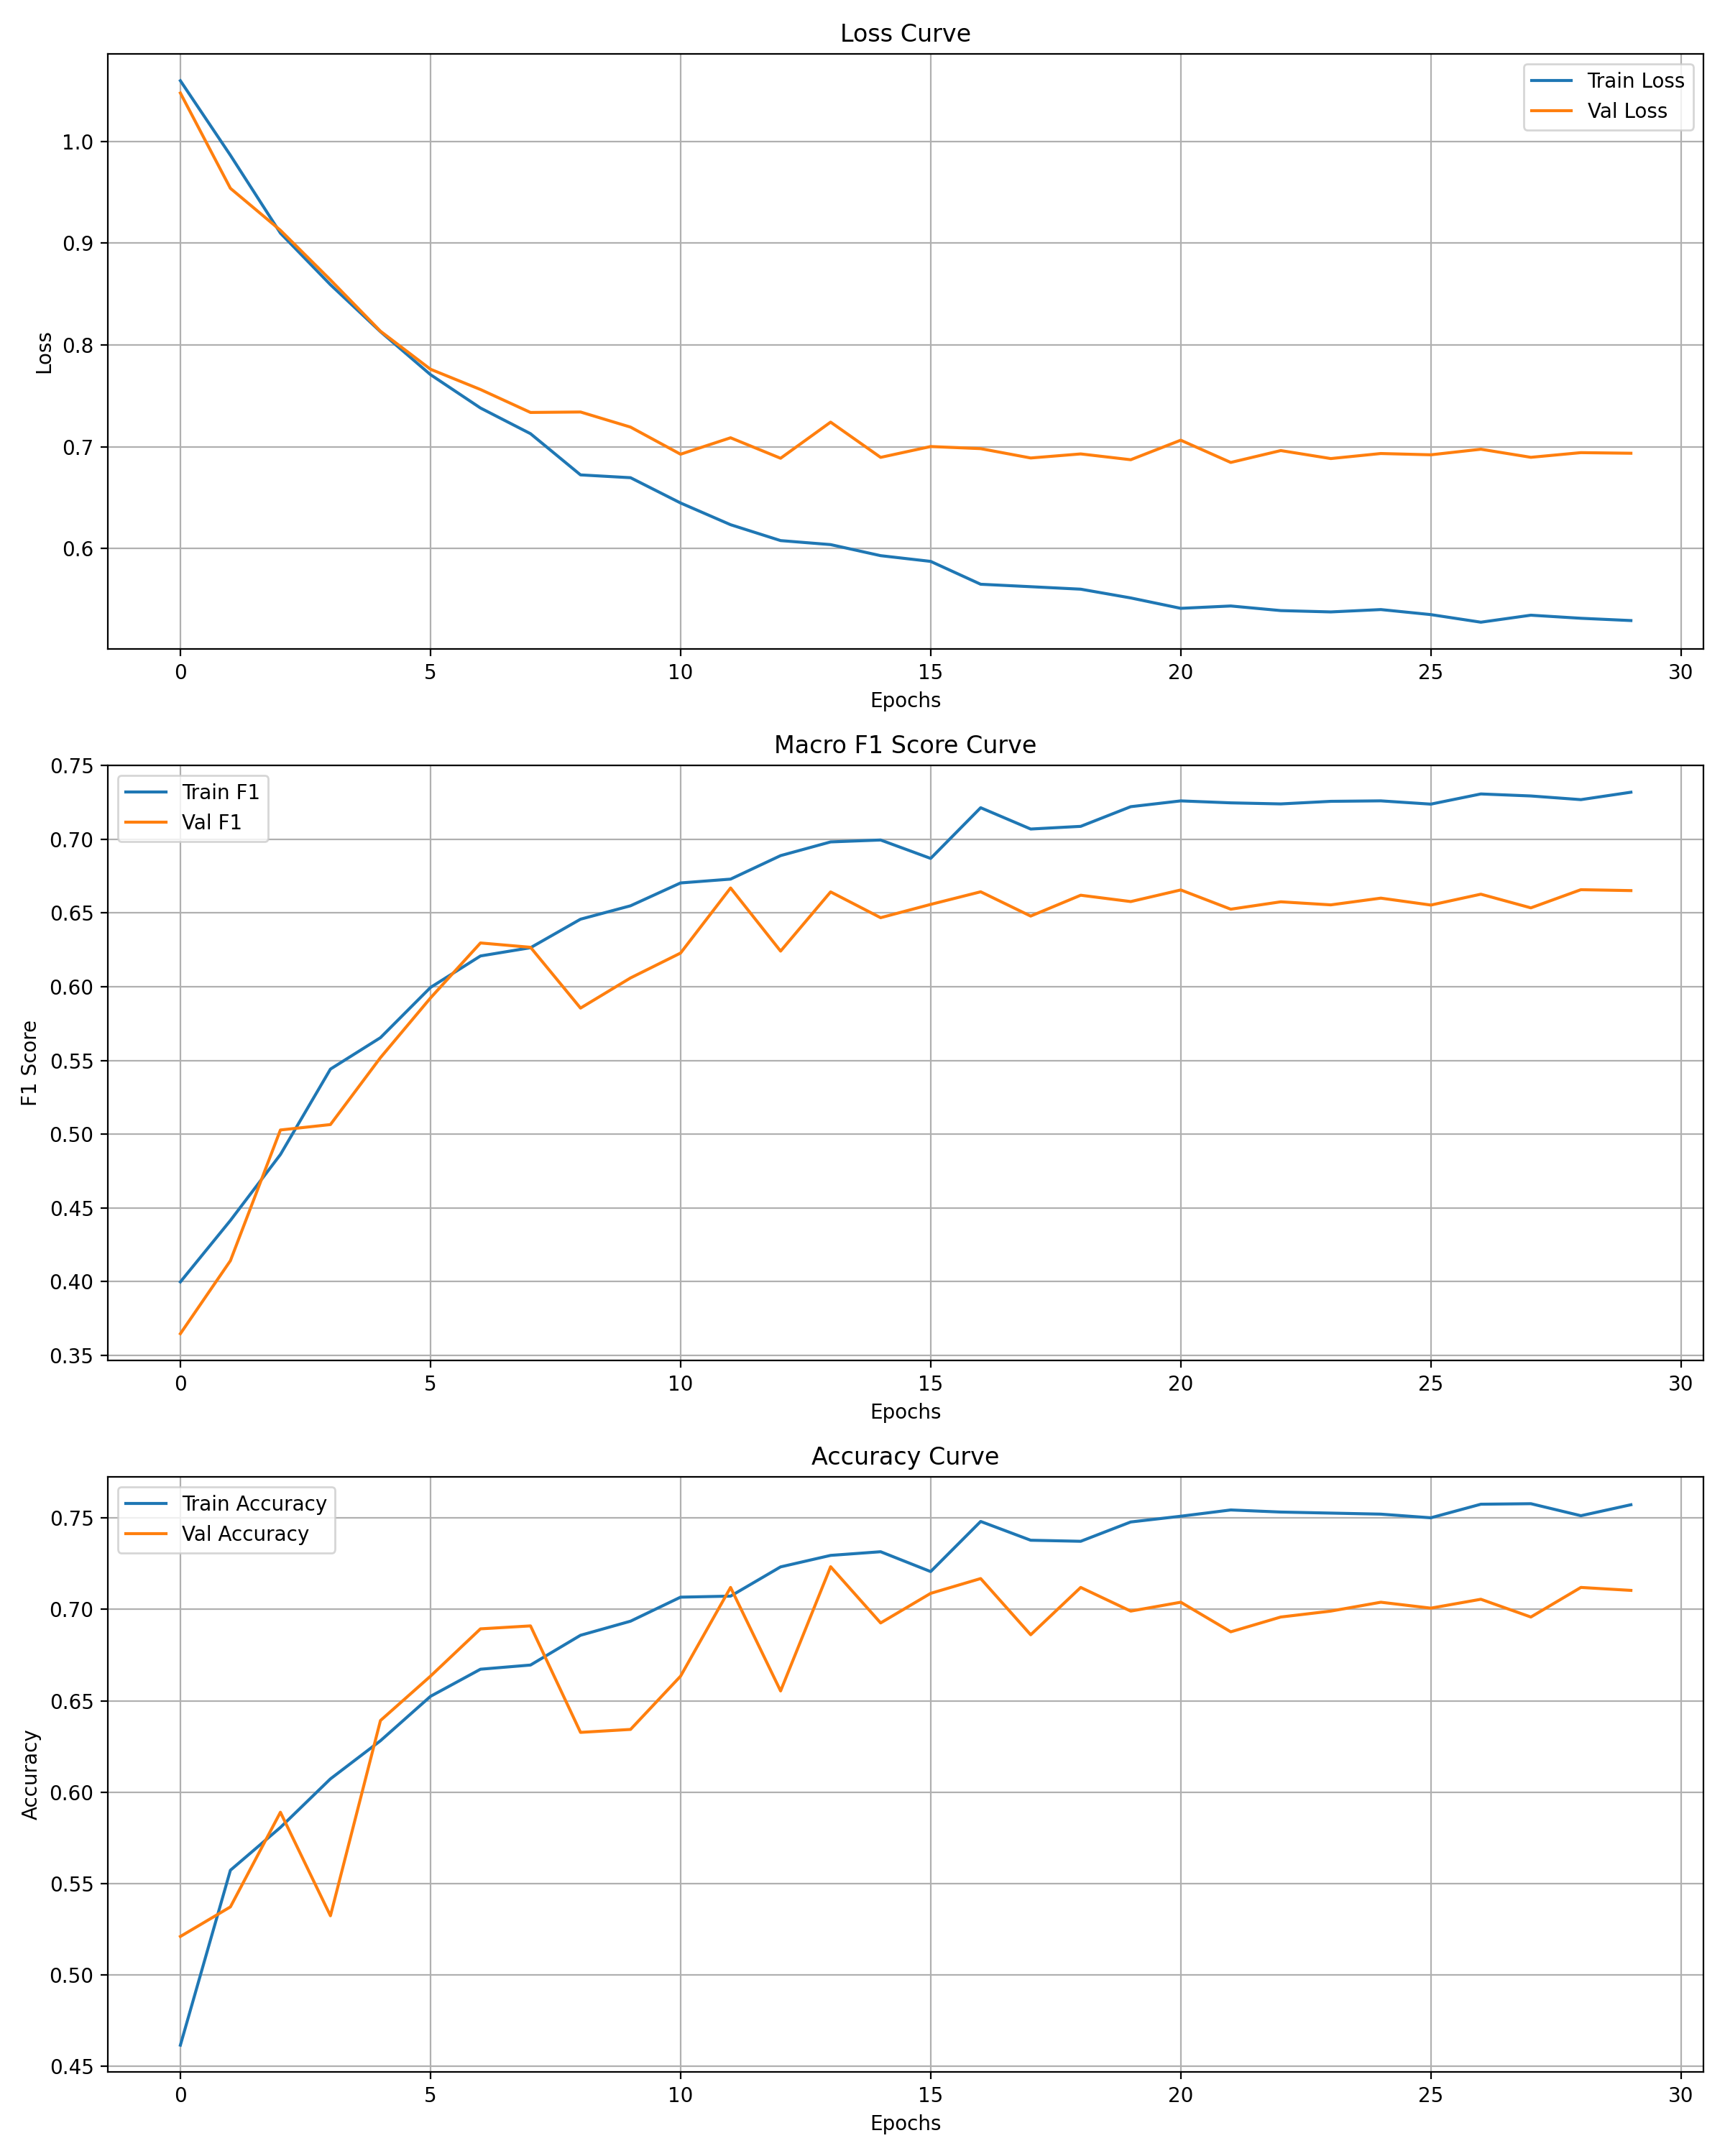

The MLP shows mild overfitting after early epochs:

- In the loss curve, training loss keeps decreasing steadily from ~1.05 to ~0.53, while validation loss plateaus around 0.69–0.70 after epoch ≈10.

- In the macro-F1 curve, validation F1 improves until around epoch 10–12 (≈0.66) and then fluctuates without further gain, while train F1 continues to rise to ≈0.73.

- A similar gap appears in accuracy: training accuracy reaches ~0.76 while validation remains around ~0.70.

This pattern—improving training metrics but stagnant validation metrics—indicates the model begins to fit training-specific noise rather than learning features that generalize.

**Possible remedies for MLP**

- Keep early stopping based on validation macro-F1 (already effective in my run).

- Increase regularization: slightly higher dropout (e.g., 0.3 → 0.4) or stronger weight decay.

- Reduce capacity (smaller hidden layer) if the gap widens.

- A lower learning rate or LR scheduling could reduce late-epoch oscillations.

 **LSTM**
 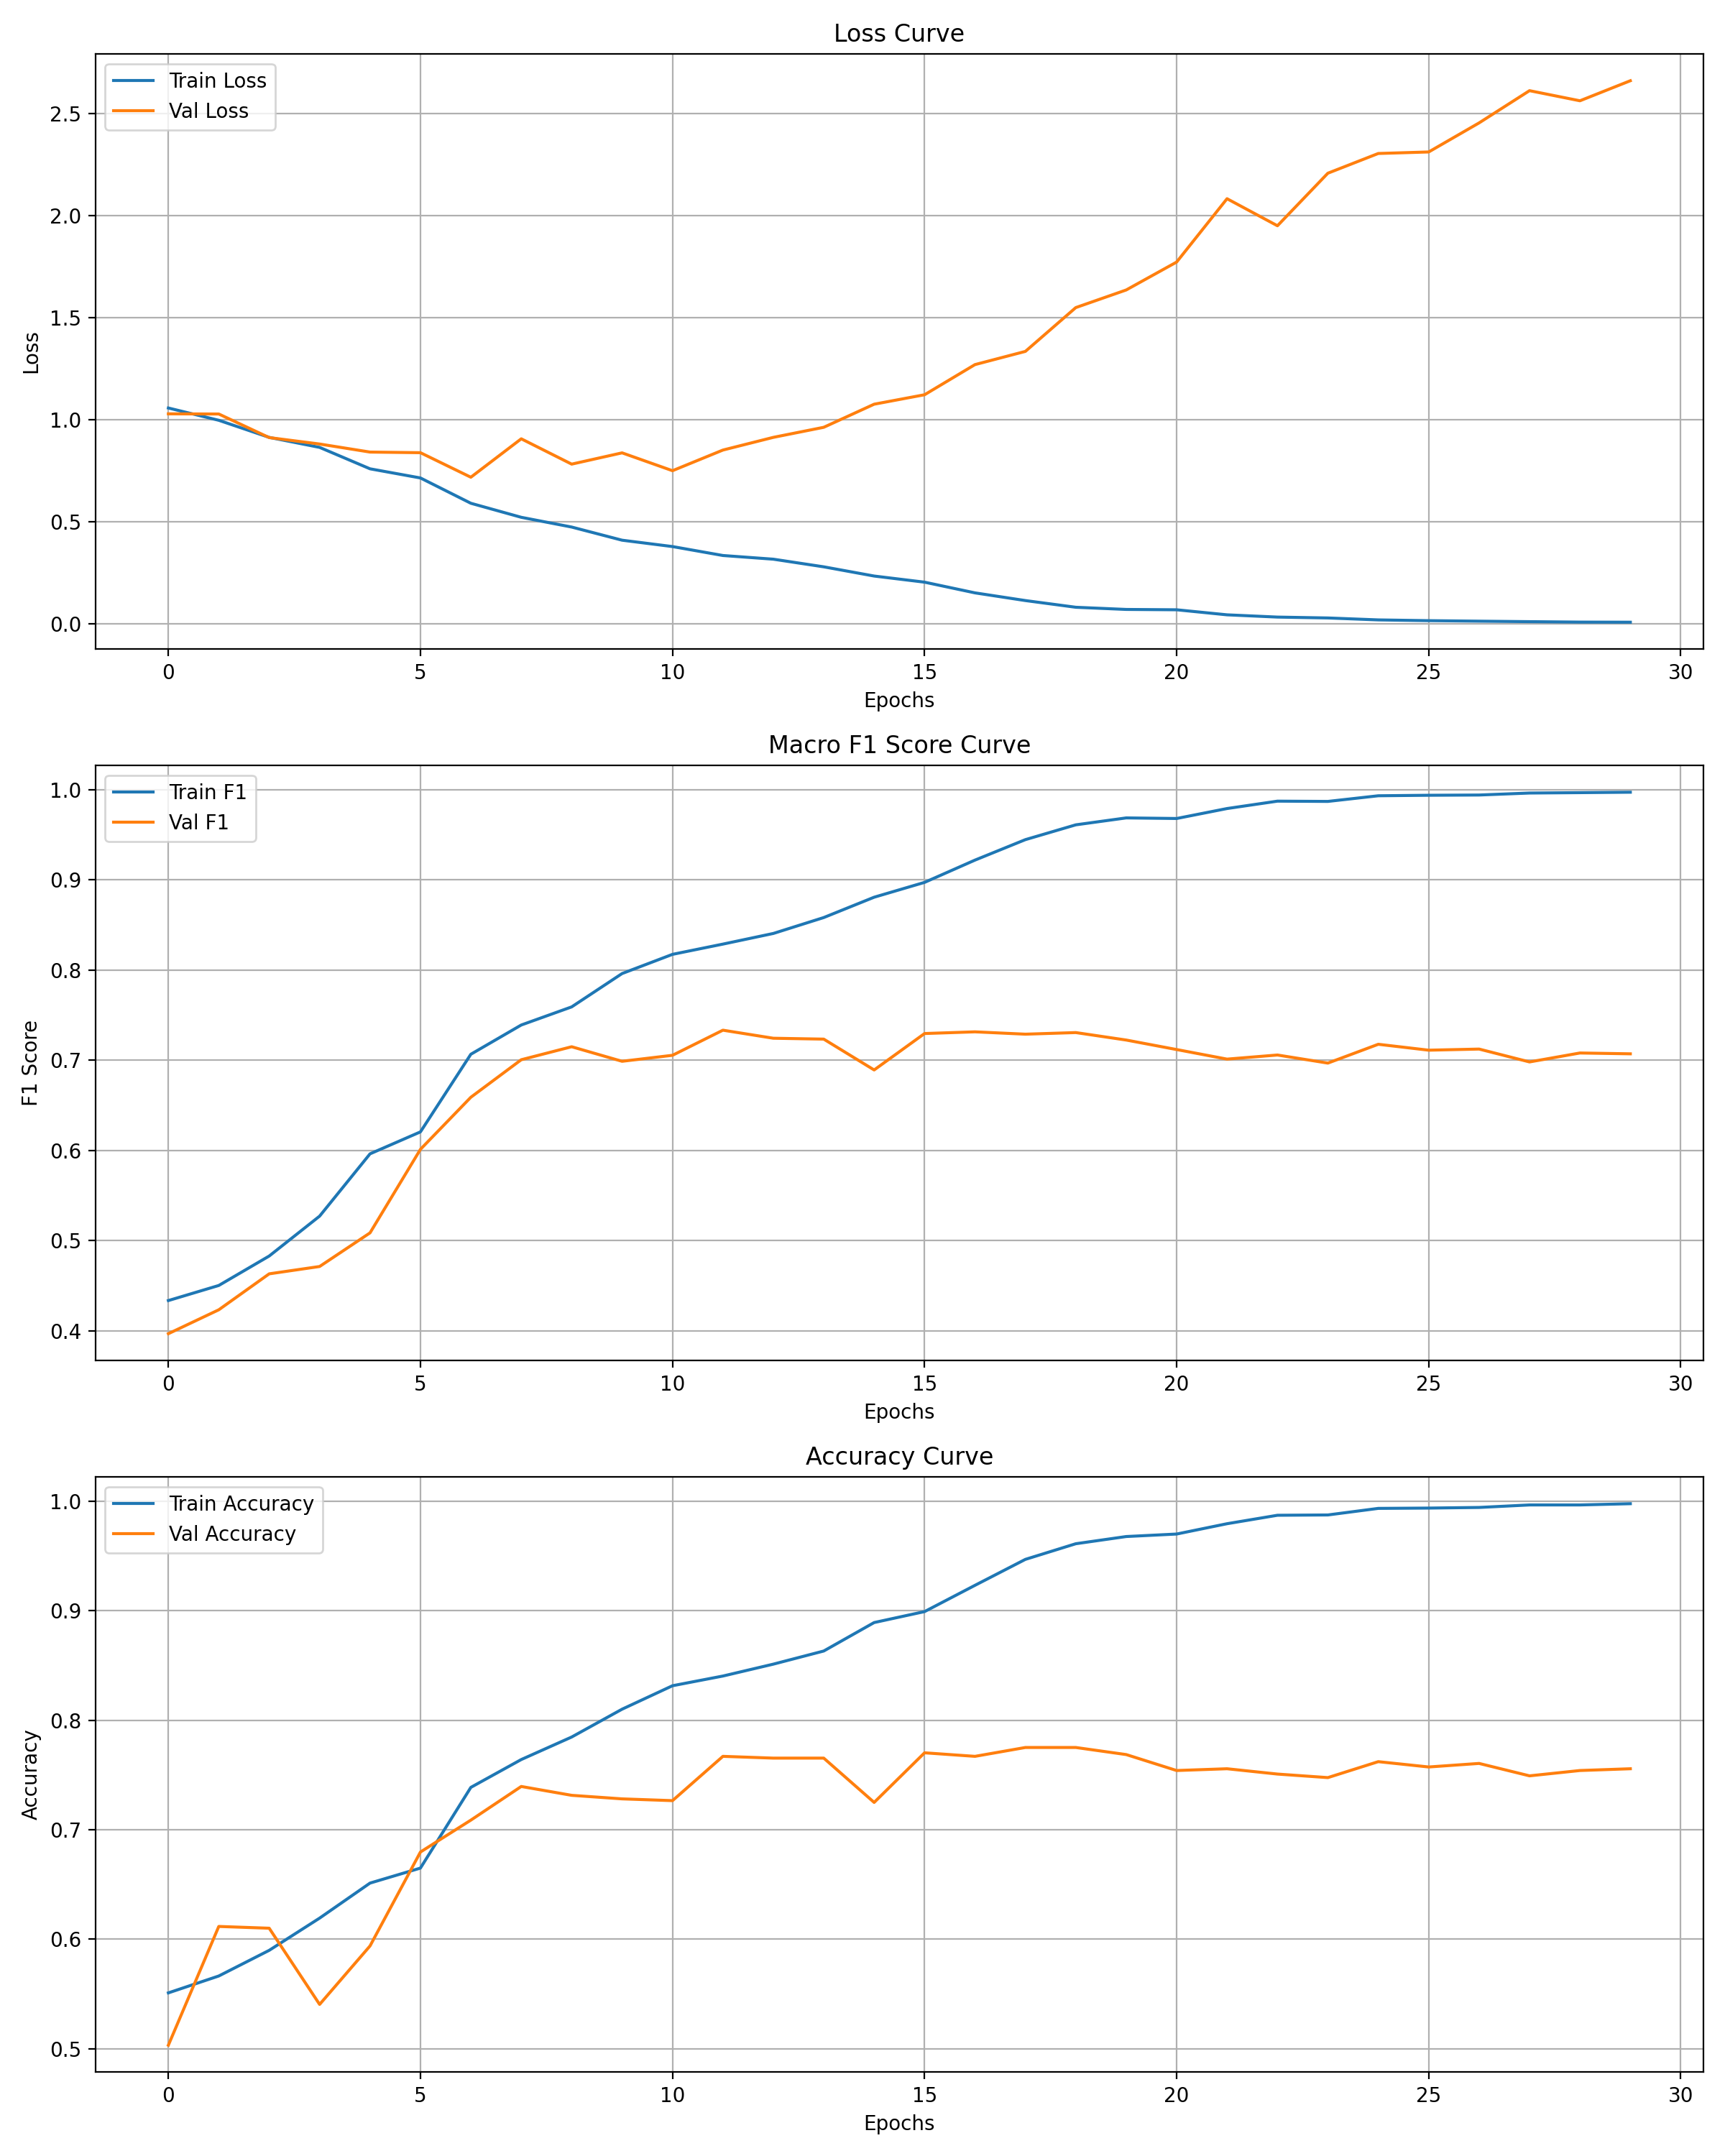

The LSTM shows clearer overfitting than the MLP:

- Training loss drops almost to zero, while validation loss increases sharply after epoch ~10, reaching >2.5.

- Training macro-F1 approaches 1.0, but validation macro-F1 saturates around ~0.72 and does not follow the training improvement.

- Accuracy curves show the same divergence (train → ~1.0 vs val → ~0.75).

This is a classic sign that the LSTM has high capacity relative to dataset size and memorizes the training set.

**Possible remedies for LSTM**

- Stronger regularization: increase dropout in the classifier head or use a smaller hidden size.

- Use 2-layer LSTM with internal dropout (dropout only applies when num_layers > 1).

- Reduce hidden dimension (e.g., 256 → 128).

- Earlier stopping or lower learning rate to avoid sharp validation degradation.

**Effect of Class Weights**

Using nn.CrossEntropyLoss(weight=…) had a noticeable impact:

- Macro-F1 improves more than accuracy in both models.

 In the MLP curves, validation accuracy stabilizes near ~0.70, but macro-F1 continues to rise to ~0.66, showing better treatment of minority classes.

- Without class weights, the model would be biased toward the neutral majority class, giving deceptively high accuracy but poor macro-F1.

**Training stability**

Class weighting makes early training slightly noisier—visible as oscillations in validation F1—because errors on minority classes are amplified.

However, it leads to better balanced decision boundaries and higher final macro-F1, which is the assignment metric.

The contrast between: relatively flat accuracy curves, and
more informative macro-F1 curves demonstrates why class weighting is important for this imbalanced dataset.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
